# IMPORT KEY LIBRARIES/DATASETS AND PERFORM BASIC EDA 

In [2]:
# Updgrade Numpy version
!pip3 install numpy --upgrade

In [3]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

In [4]:
# Updgrade Seaborn version
!pip3 install seaborn --upgrade

In [5]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization

In [6]:
# Read the CSV file 
university_df = pd.read_csv("university_admission.csv")

In [7]:
# Load the top 6 instances
university_df.head(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90


In [8]:
# Load the bottom 6 instances 
university_df.tail(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
994,301,99,3,2.5,2.0,8.45,1,0.68
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73
999,327,113,4,4.5,4.5,9.04,0,0.84


In [9]:
# Display the feature columns
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [10]:
# Check the shape of the dataframe
university_df.shape

(1000, 8)

In [11]:
# Check if any missing values are present in the dataframe
university_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [13]:
# Check if any missing values are present in the dataframe
university_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [11]:
# Check if any missing values are present in the dataframe
university_df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

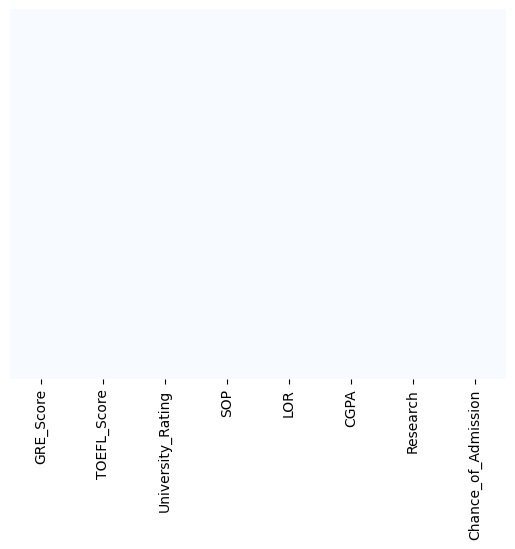

In [14]:
# check if there are any Null values
sns.heatmap(university_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

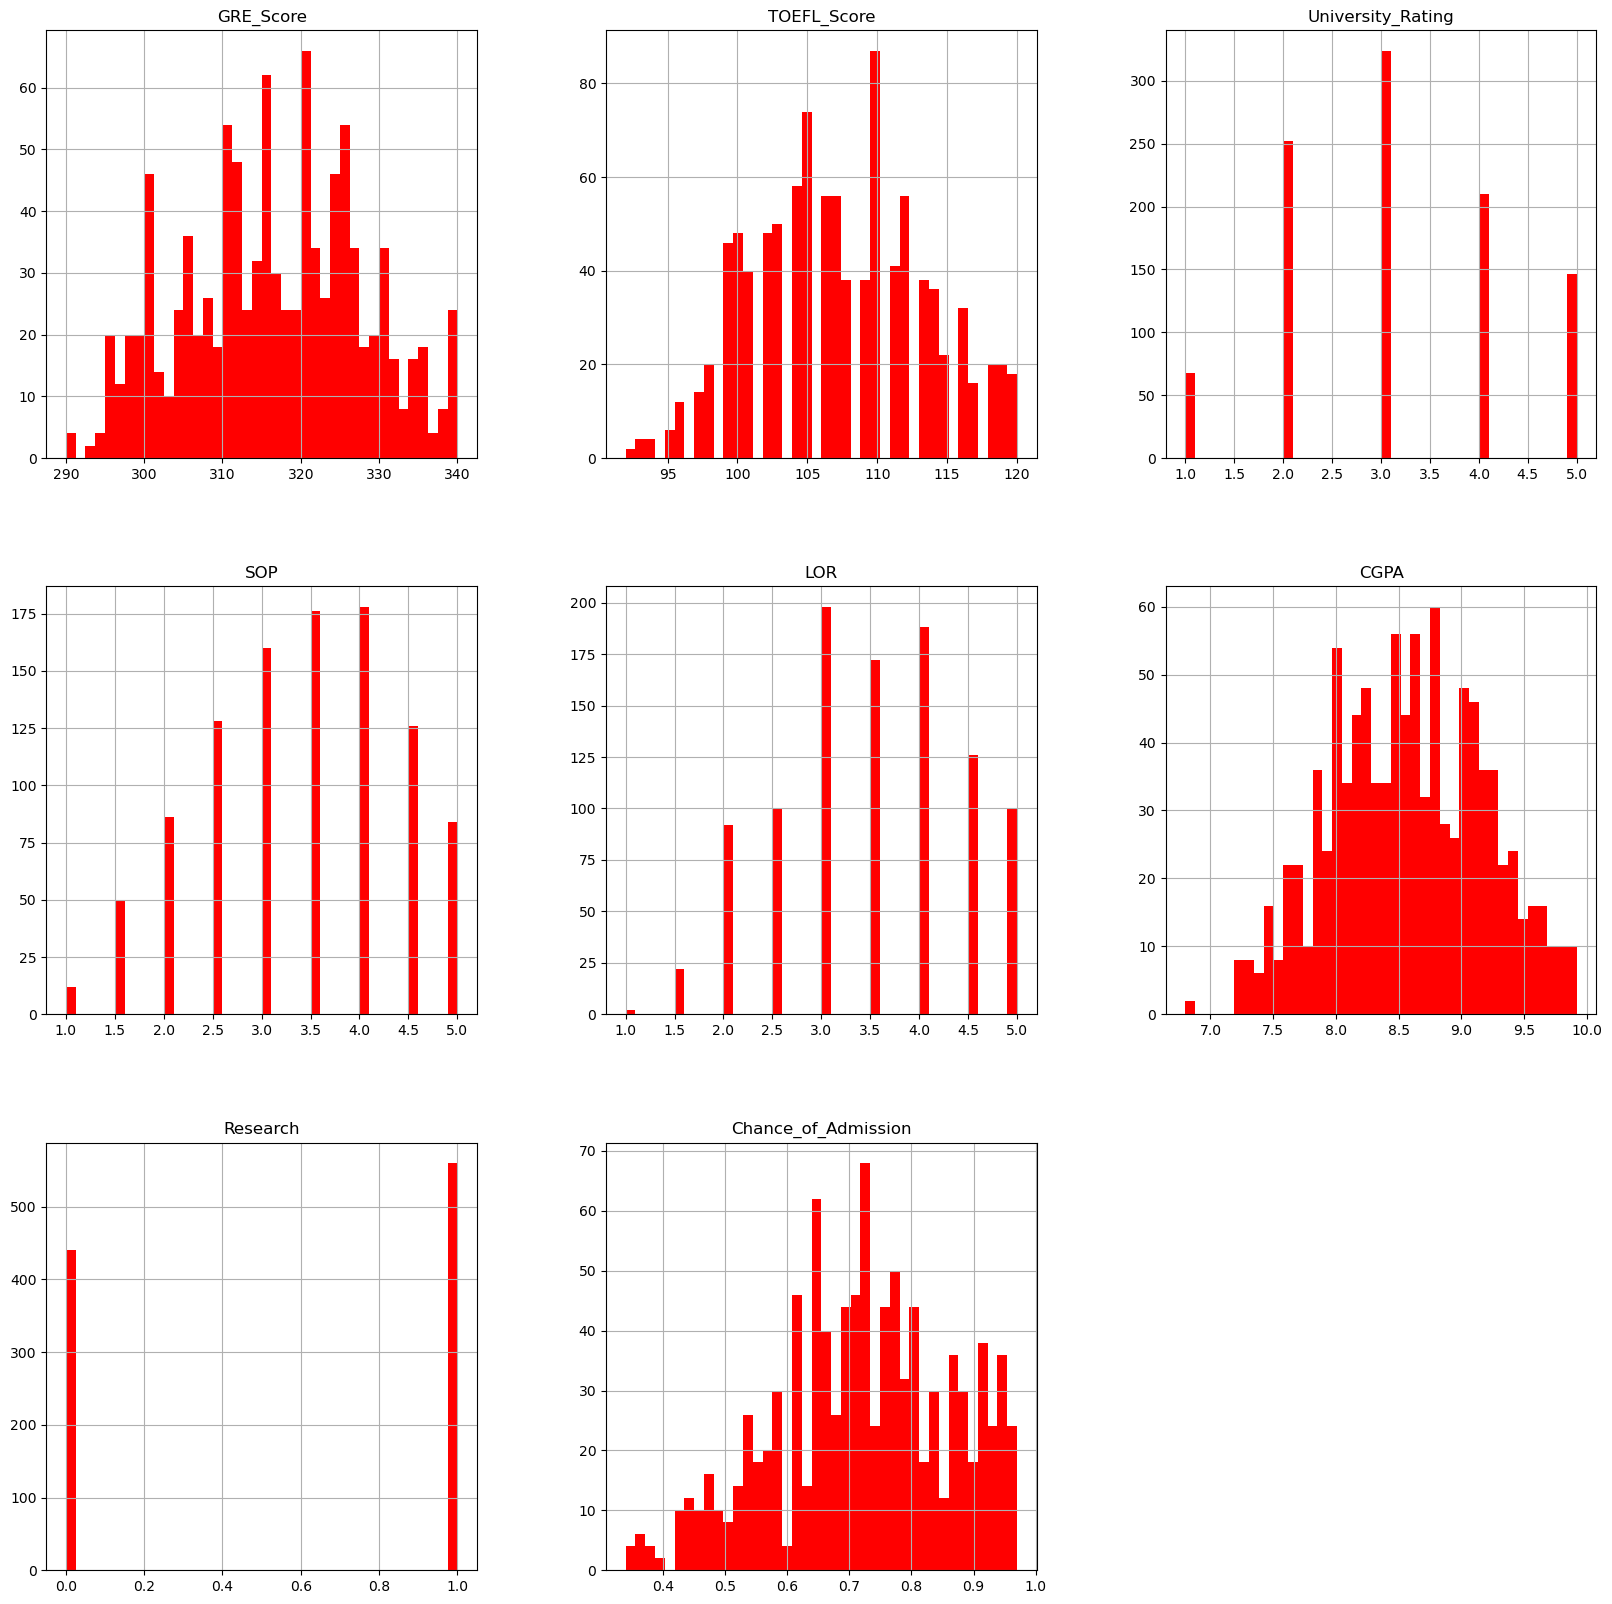

In [15]:
university_df.hist(bins = 40, figsize = (20,20), color = 'r');
plt.show()

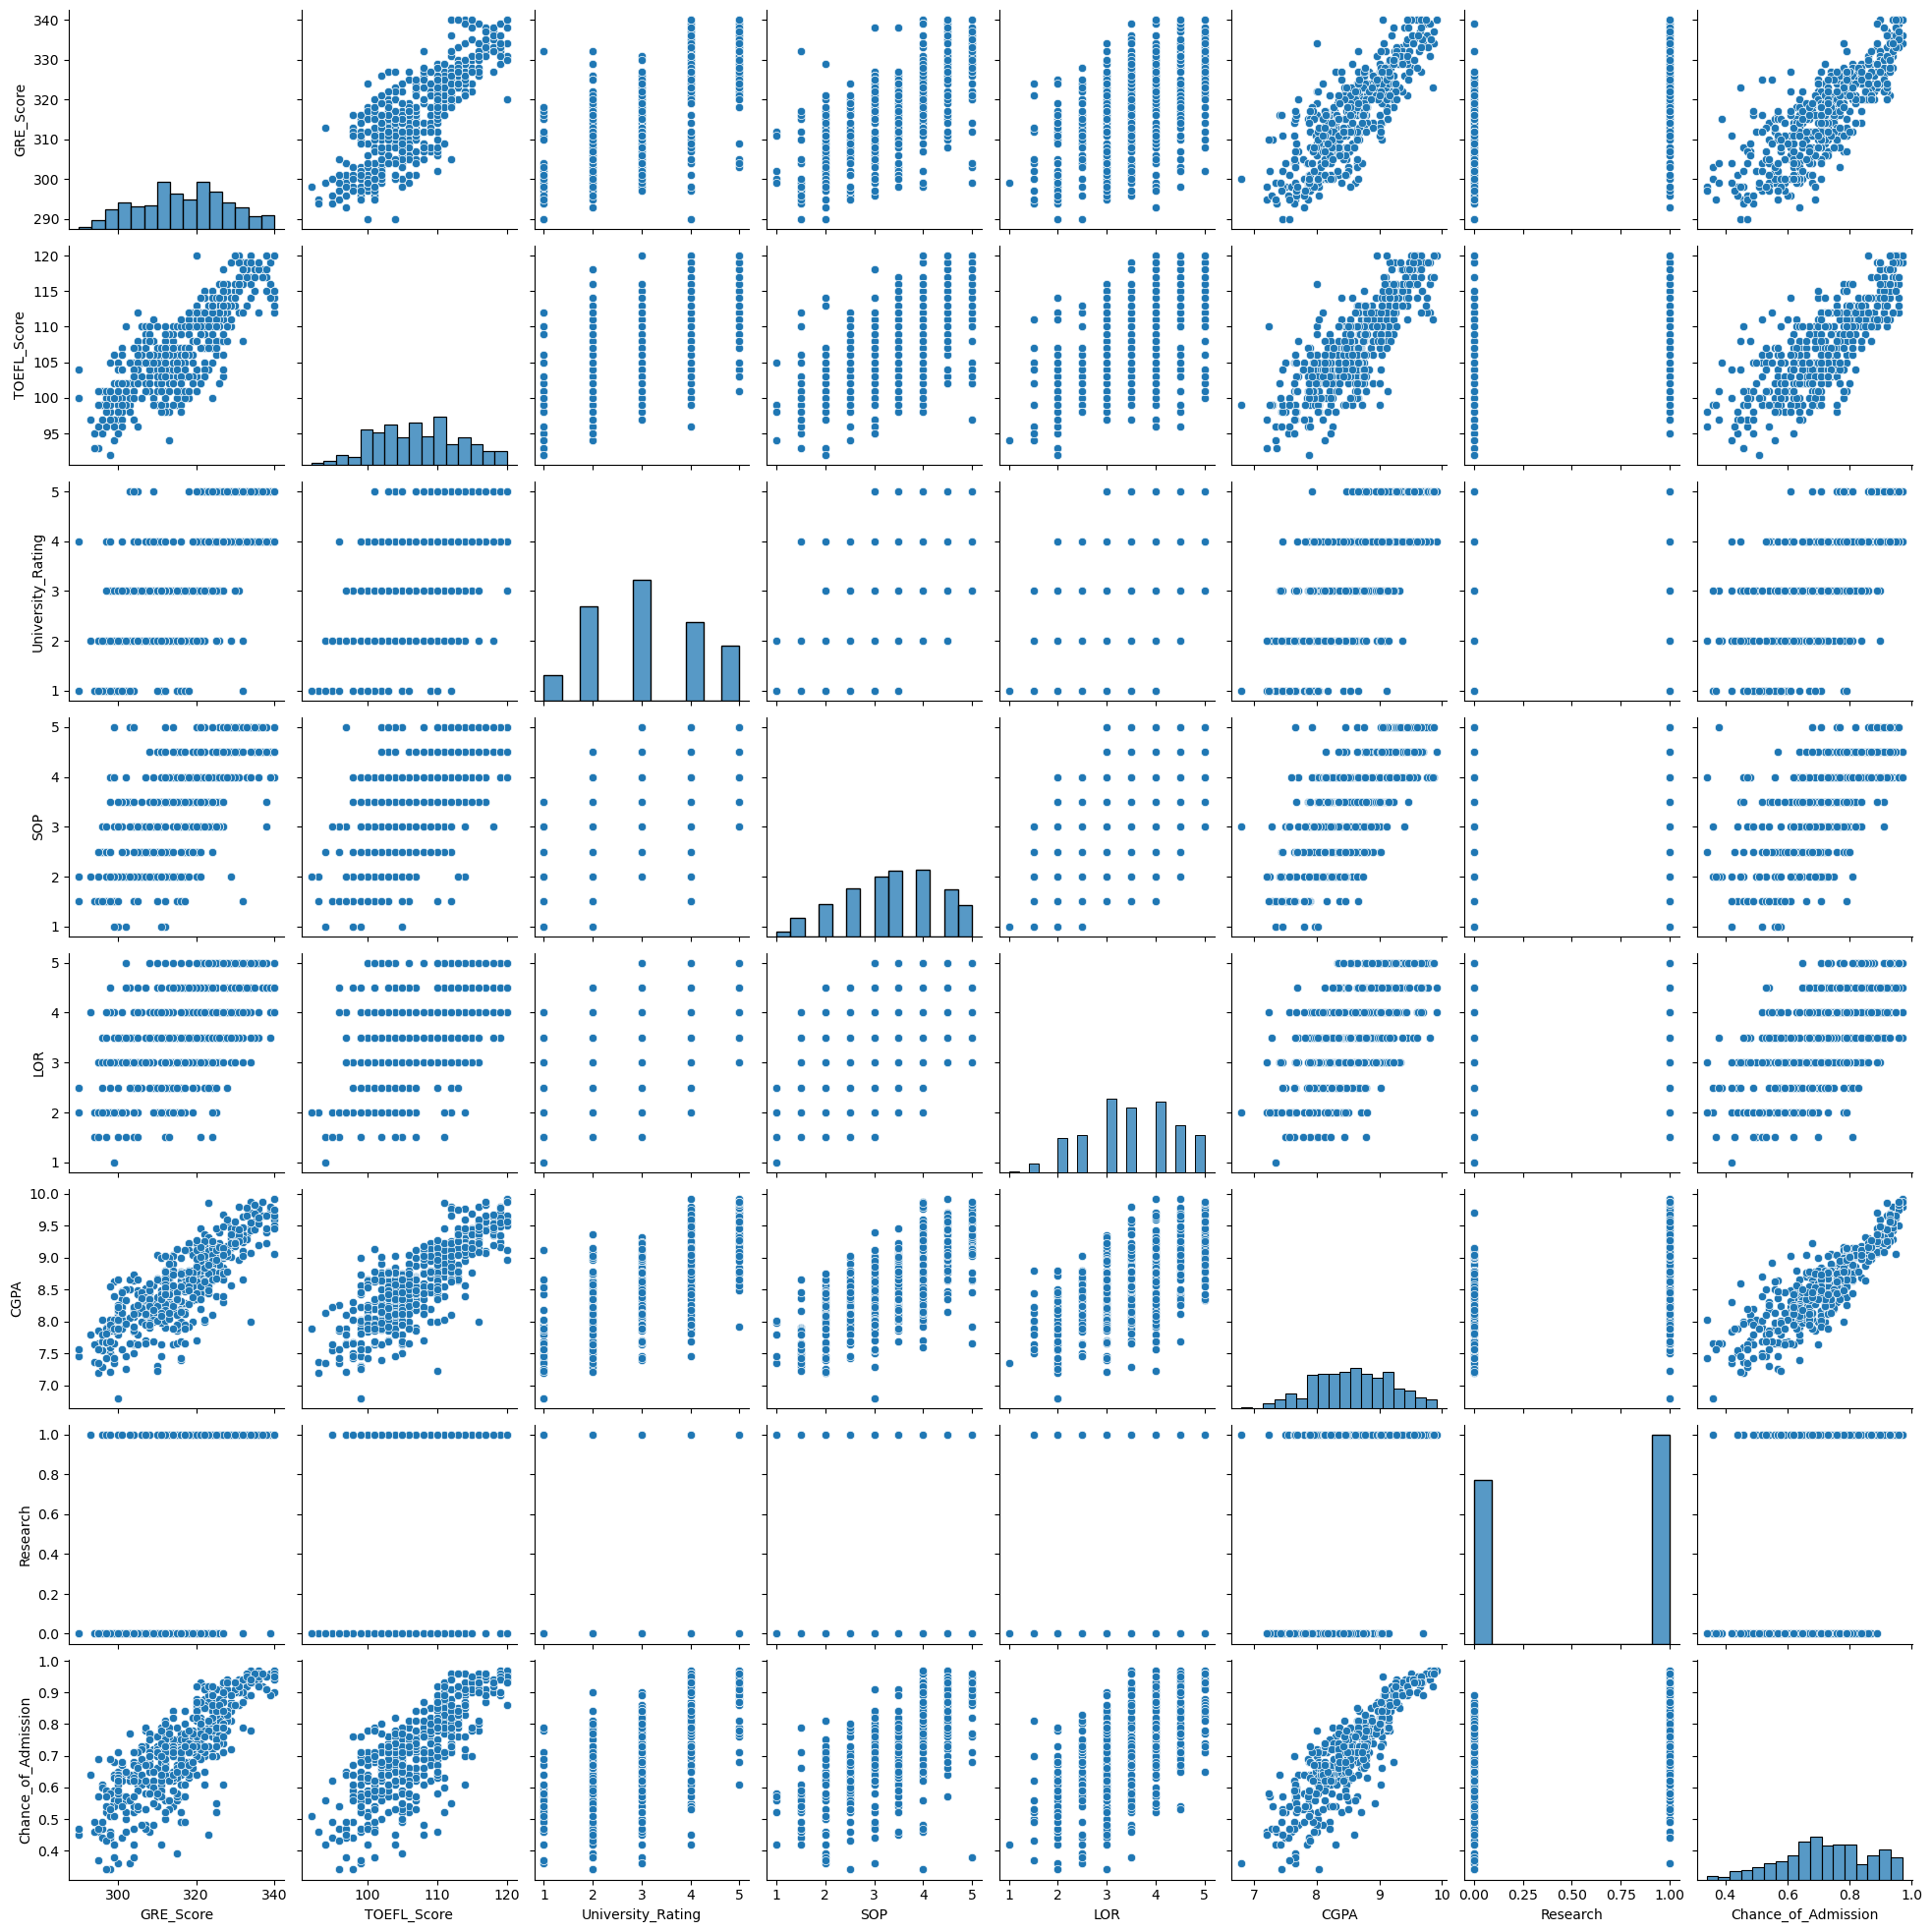

In [16]:
sns.pairplot(university_df)
plt.show()

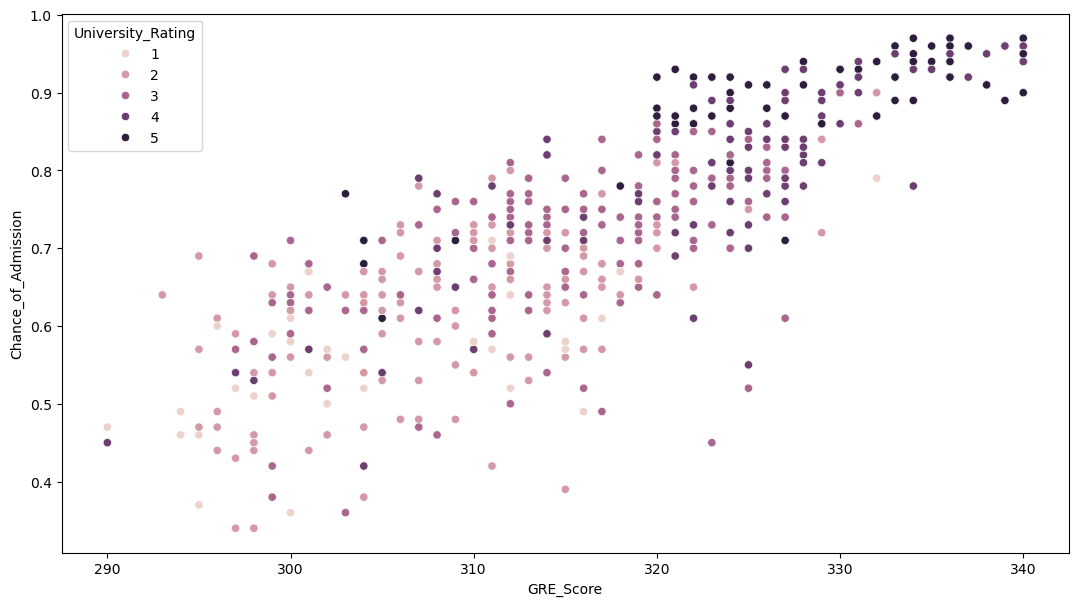

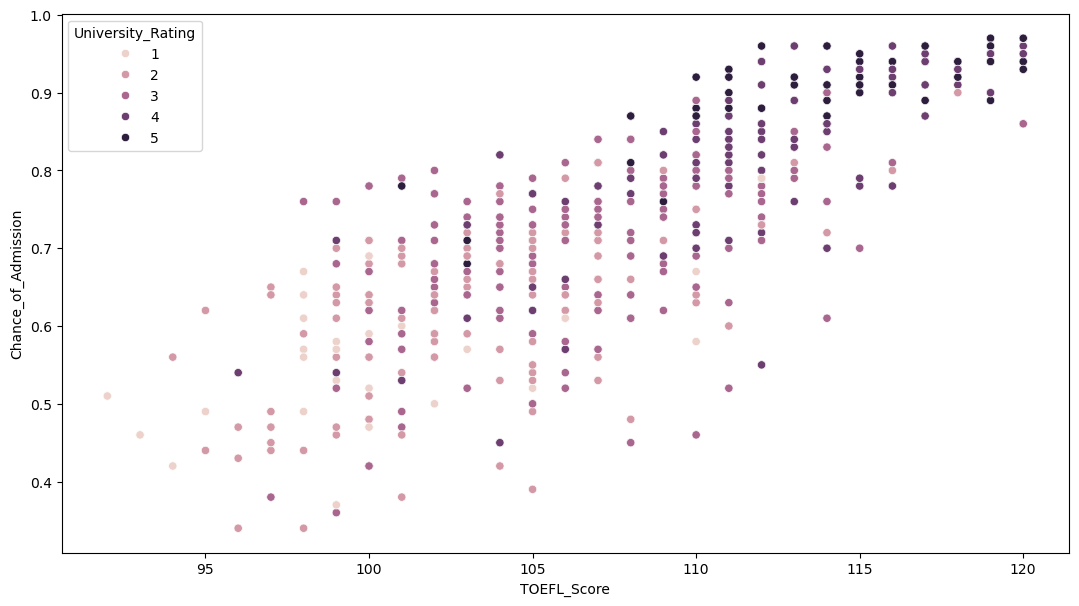

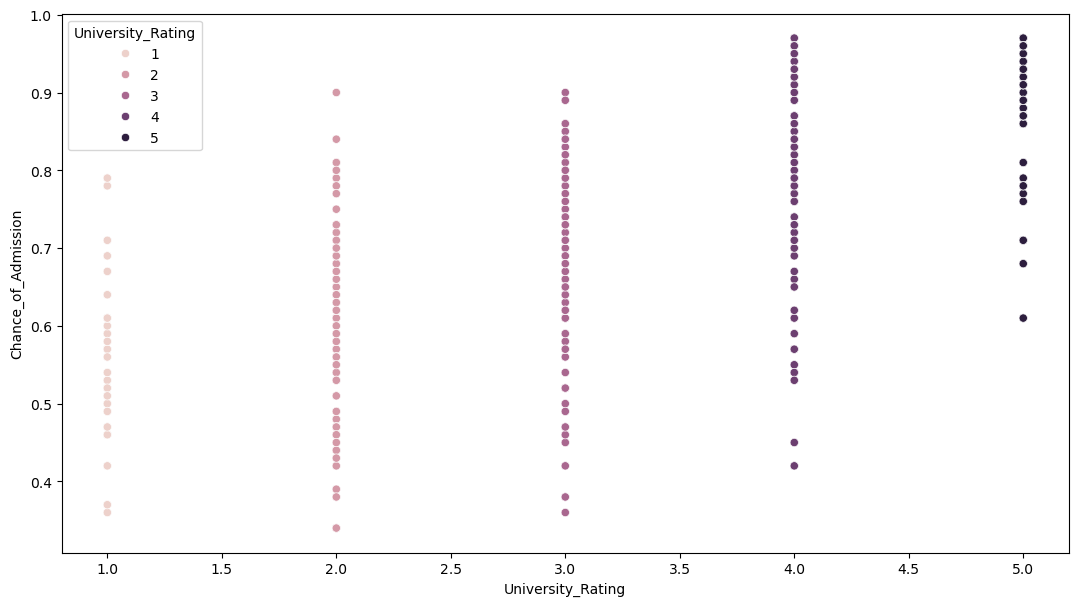

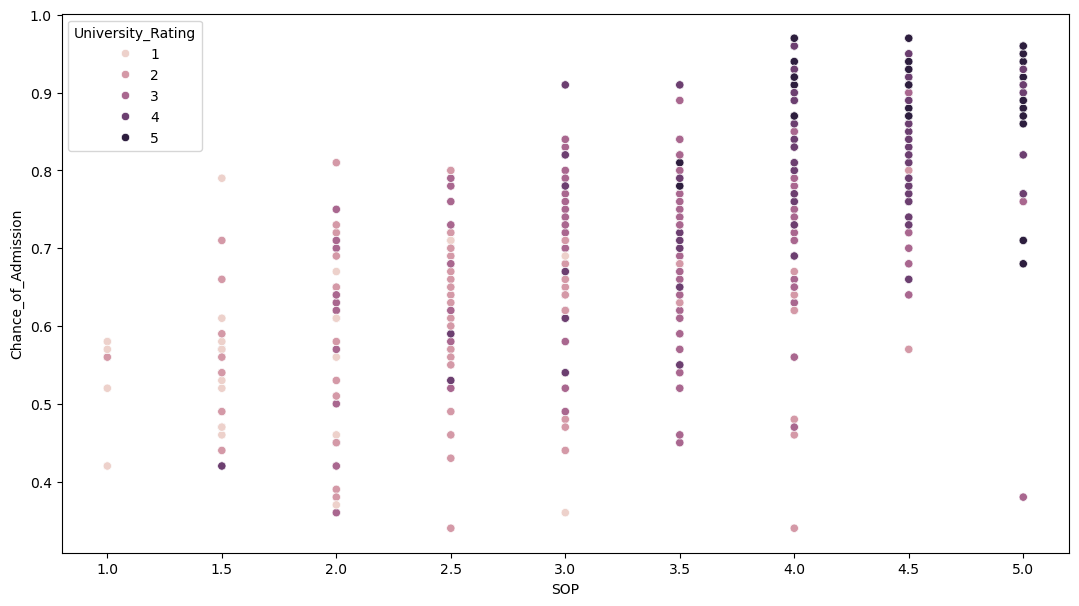

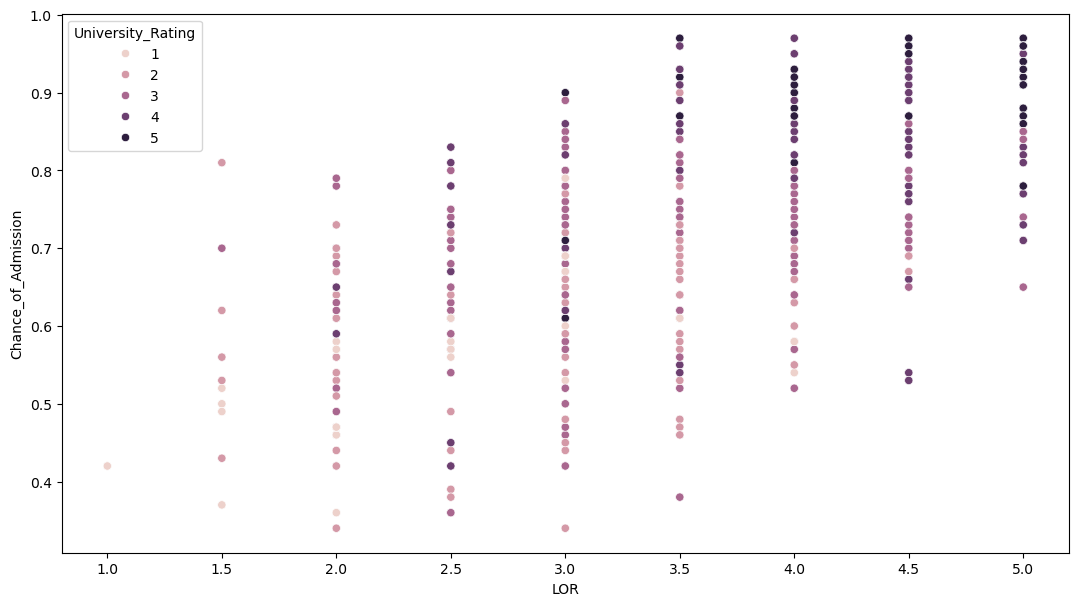

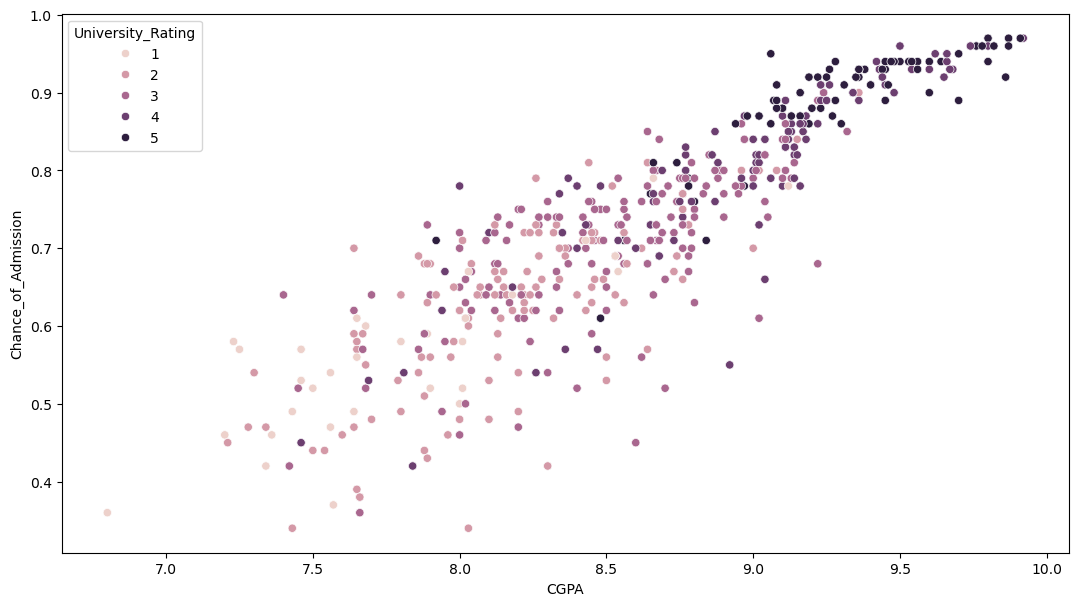

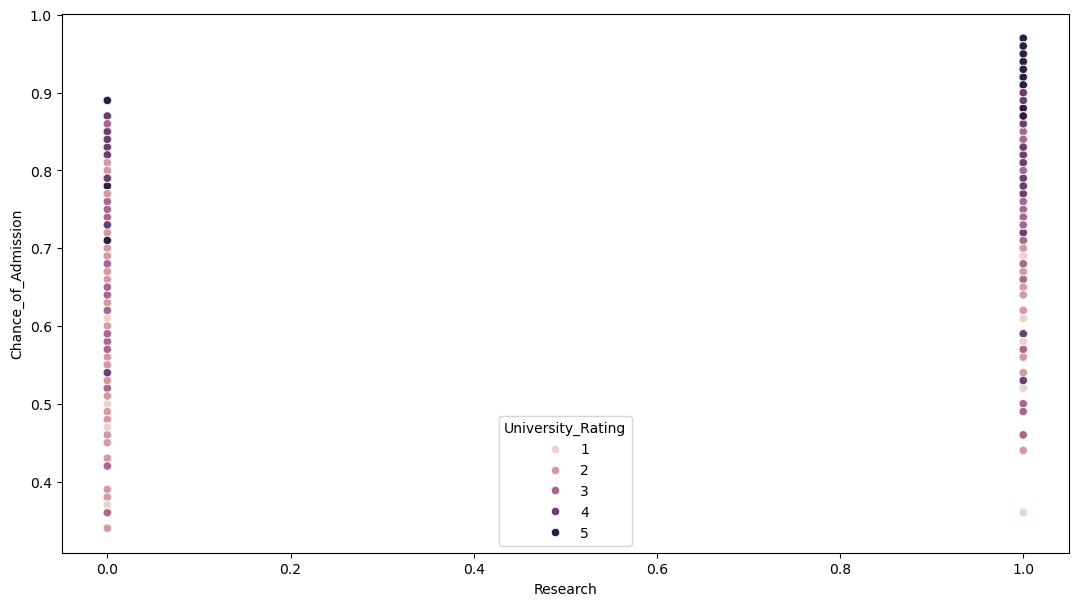

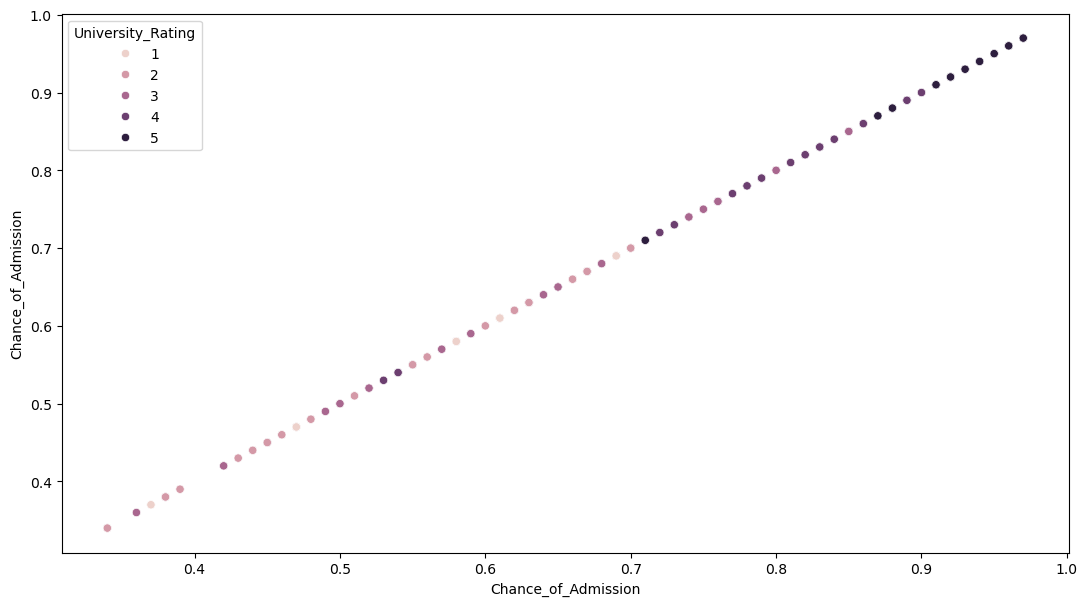

In [17]:
for i in university_df.columns:
  plt.figure(figsize = (13, 7))
  sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = university_df)
  plt.show()

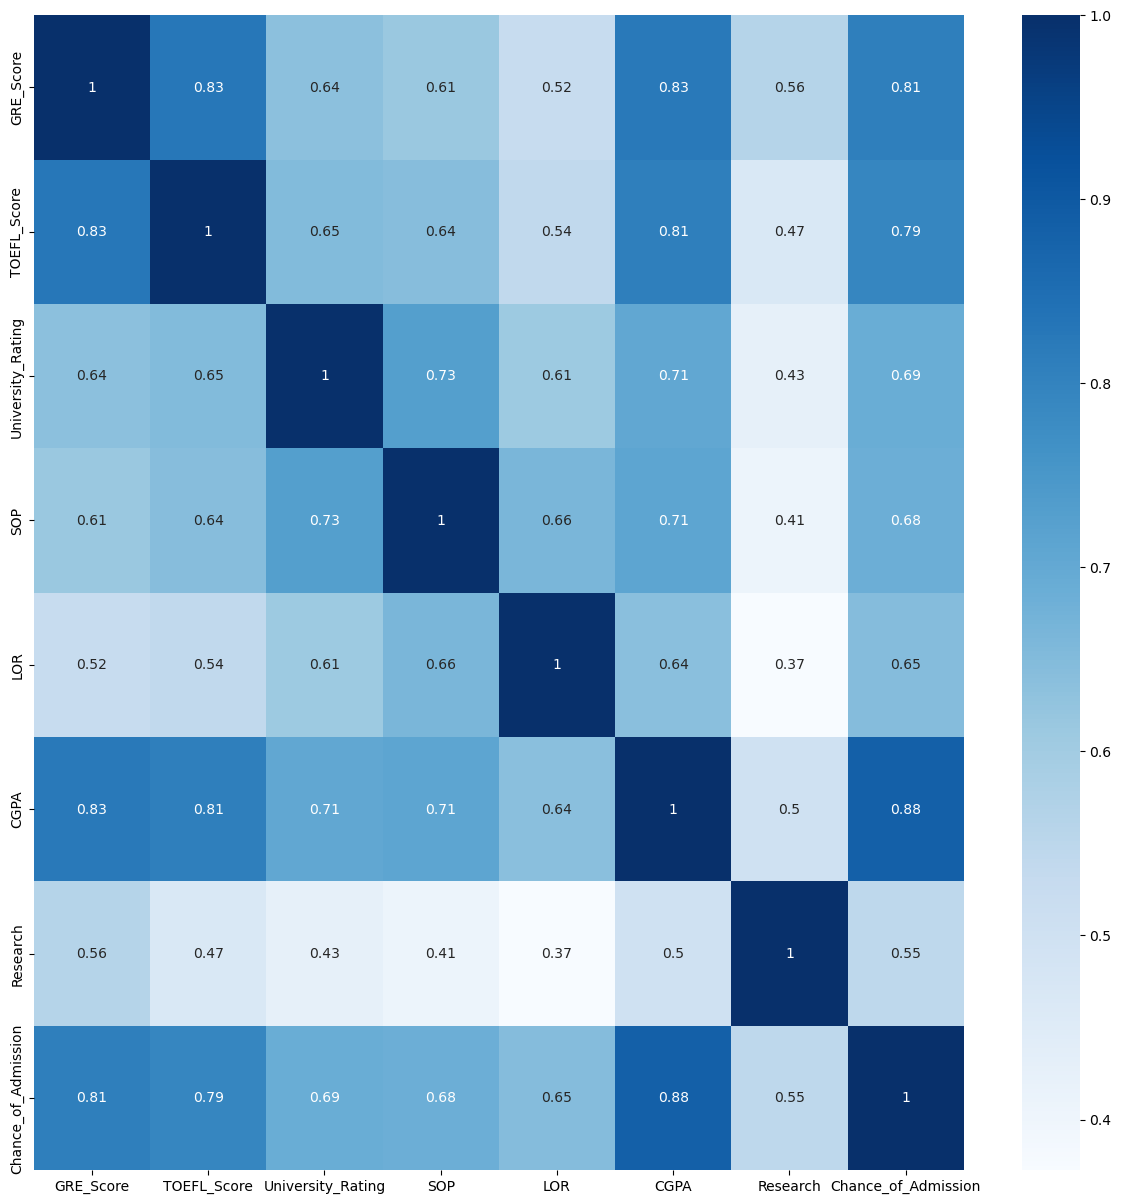

In [26]:
# Plot the correlation matrix
plt.figure(figsize = (15,15))
corr_matrix = university_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap="Blues")
plt.show()

# PREPARE THE DATA FOR TRAINING

In [27]:
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [33]:
X = university_df.drop(columns = ['Chance_of_Admission'])

In [34]:
y = university_df[['Chance_of_Admission']]

In [35]:
X.shape

(1000, 7)

In [36]:
y.shape

(1000, 1)

In [37]:
X = np.array(X)
y = np.array(y)

In [38]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [39]:
X_train.shape

(600, 7)

In [40]:
X_test.shape

(200, 7)

In [41]:
X_val.shape

(200, 7)

In [42]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [46]:
train_data

,Target,0,1,2,3,4,5,6
0,0.72,312.0,105.0,2.0,2.0,2.5,8.45,0.0
1,0.92,331.0,115.0,5.0,4.0,3.5,9.44,1.0
2,0.57,302.0,99.0,1.0,2.0,2.0,7.25,0.0
3,0.59,299.0,100.0,1.0,1.5,2.0,7.89,0.0
4,0.79,325.0,110.0,4.0,4.5,4.0,8.96,1.0
...,...,...,...,...,...,...,...,...
595,0.68,304.0,103.0,5.0,5.0,4.0,8.64,0.0
596,0.70,324.0,111.0,3.0,2.5,1.5,8.79,1.0
597,0.77,303.0,105.0,5.0,5.0,4.5,8.65,0.0
598,0.68,318.0,109.0,3.0,3.5,4.0,9.22,1.0


In [47]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [48]:
val_data

,Target,0,1,2,3,4,5,6
0,0.79,326.0,110.0,3.0,3.5,3.5,8.76,1.0
1,0.54,305.0,96.0,4.0,3.0,4.5,8.26,0.0
2,0.95,333.0,117.0,4.0,5.0,4.0,9.66,1.0
3,0.67,318.0,109.0,3.0,3.0,3.0,8.50,0.0
4,0.74,314.0,106.0,3.0,3.0,5.0,8.90,0.0
...,...,...,...,...,...,...,...,...
195,0.61,305.0,108.0,5.0,3.0,3.0,8.48,0.0
196,0.51,299.0,100.0,2.0,2.0,2.0,7.88,0.0
197,0.56,299.0,102.0,3.0,4.0,3.5,8.62,0.0
198,0.93,330.0,116.0,5.0,5.0,4.5,9.36,1.0


In [49]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [50]:
import sagemaker
import boto3
from sagemaker import Session

# Initiate a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'ml-lab-sagemaker' 
prefix = 'XGBoost-Regressor-University-Admission'
key = 'XGBoost-Regressor'

# Creating an execution role
role = sagemaker.get_execution_role()

print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
arn:aws:iam::588738589118:role/service-role/AmazonSageMaker-ExecutionRole-20241129T190553


In [52]:
# Read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Printing the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://ml-lab-sagemaker/XGBoost-Regressor-University-Admission/train/XGBoost-Regressor


In [53]:
# Read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Printing the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://ml-lab-sagemaker/XGBoost-Regressor-University-Admission/validation/XGBoost-Regressor


In [54]:
# Creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://ml-lab-sagemaker/XGBoost-Regressor-University-Admission/output


# TRAIN AN XG-BOOST ALGORITHM IN SAGEMAKER

In [55]:
# Obtain a reference to the XGBoost container image
# Version 1.0-1 better suits the general purpose compute (m4,m5)
# Reference: https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost.html

container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

In [72]:
Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m5.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

Xgboost_regressor.set_hyperparameters(max_depth = 6,
                           objective = 'reg:squarederror',
                           colsample_bytree = 0.3,
                           alpha = 5,
                           eta = 0.05,
                           num_round = 200)

In [73]:
# Creating "train", "validation" channels to train the model

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type = 'csv', s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type = 'csv', s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor.fit(data_channels)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-12-04-07-17-49-704


2024-12-04 07:17:49 Starting - Starting the training job...
2024-12-04 07:18:08 Starting - Preparing the instances for training...
2024-12-04 07:18:49 Downloading - Downloading the training image......
2024-12-04 07:19:45 Training - Training image download completed. Training in progress.
2024-12-04 07:19:45 Uploading - Uploading generated training model[2024-12-04 07:19:40.585 ip-10-0-65-102.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Deter

# DEPLOY THE MODEL TO MAKE PREDICTIONS

In [74]:
predictor = Xgboost_regressor.deploy(initial_instance_count = 1, instance_type = "ml.m5.xlarge")

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-12-04-07-22-18-500
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-12-04-07-22-18-500
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-12-04-07-22-18-500


------!

In [75]:
from sagemaker.serializers import CSVSerializer

# Set the predictor to use CSV format for serializing input data before sending it to the deployed model
predictor.serializer = CSVSerializer()

In [76]:
predictions = predictor.predict(X_test)
predictions

b'0.608595609664917,0.8609511256217957,0.7305024862289429,0.8519519567489624,0.8600655198097229,0.8709373474121094,0.6822437047958374,0.8411931991577148,0.5173673629760742,0.5714117288589478,0.8709373474121094,0.5430266857147217,0.7948272824287415,0.8460619449615479,0.5174510478973389,0.7510563135147095,0.6293778419494629,0.7476586699485779,0.8709373474121094,0.643556535243988,0.6036887168884277,0.7352253198623657,0.8243651986122131,0.6702076196670532,0.6225672364234924,0.5389028191566467,0.6409172415733337,0.5590899586677551,0.6463637351989746,0.7004221677780151,0.6804987192153931,0.8709373474121094,0.6814271807670593,0.6646348834037781,0.845156192779541,0.6686681509017944,0.7195979356765747,0.8281877040863037,0.7306017875671387,0.728644847869873,0.6508861780166626,0.6345210075378418,0.8709373474121094,0.7979400157928467,0.8709373474121094,0.8269795775413513,0.7778927087783813,0.7948272824287415,0.5208445191383362,0.7444165945053101,0.74946129322052,0.814170241355896,0.676603913307189

In [77]:
# Decode the byte string to a regular string
decoded_predictions = predictions.decode('utf-8')

In [78]:
# Split the string by commas to get individual predictions
split_predictions = decoded_predictions.split(',')

In [79]:
# Convert the split strings into a numpy array of floats
predicted_values = np.array(split_predictions, dtype=np.float32)

In [80]:
# Reshaping the values to be (200,1)
predicted_values = predicted_values.reshape(-1,1)

In [81]:
predicted_values.shape

(200, 1)

In [82]:
predicted_values

array([[0.6085956 ],
       [0.8609511 ],
       [0.7305025 ],
       [0.85195196],
       [0.8600655 ],
       [0.87093735],
       [0.6822437 ],
       [0.8411932 ],
       [0.51736736],
       [0.5714117 ],
       [0.87093735],
       [0.5430267 ],
       [0.7948273 ],
       [0.84606194],
       [0.51745105],
       [0.7510563 ],
       [0.62937784],
       [0.74765867],
       [0.87093735],
       [0.64355654],
       [0.6036887 ],
       [0.7352253 ],
       [0.8243652 ],
       [0.6702076 ],
       [0.62256724],
       [0.5389028 ],
       [0.64091724],
       [0.55908996],
       [0.64636374],
       [0.70042217],
       [0.6804987 ],
       [0.87093735],
       [0.6814272 ],
       [0.6646349 ],
       [0.8451562 ],
       [0.66866815],
       [0.71959794],
       [0.8281877 ],
       [0.7306018 ],
       [0.72864485],
       [0.6508862 ],
       [0.634521  ],
       [0.87093735],
       [0.79794   ],
       [0.87093735],
       [0.8269796 ],
       [0.7778927 ],
       [0.794

In [83]:
y_test.shape

(200, 1)

In [84]:
y_test

array([[0.62],
       [0.94],
       [0.77],
       [0.87],
       [0.91],
       [0.9 ],
       [0.7 ],
       [0.86],
       [0.51],
       [0.53],
       [0.95],
       [0.52],
       [0.81],
       [0.87],
       [0.53],
       [0.73],
       [0.65],
       [0.73],
       [0.86],
       [0.59],
       [0.71],
       [0.81],
       [0.79],
       [0.67],
       [0.58],
       [0.5 ],
       [0.71],
       [0.54],
       [0.65],
       [0.73],
       [0.71],
       [0.91],
       [0.64],
       [0.69],
       [0.88],
       [0.6 ],
       [0.76],
       [0.85],
       [0.7 ],
       [0.75],
       [0.72],
       [0.64],
       [0.94],
       [0.78],
       [0.92],
       [0.84],
       [0.55],
       [0.81],
       [0.43],
       [0.75],
       [0.75],
       [0.77],
       [0.62],
       [0.56],
       [0.74],
       [0.94],
       [0.92],
       [0.75],
       [0.44],
       [0.64],
       [0.82],
       [0.54],
       [0.78],
       [0.65],
       [0.9 ],
       [0.91],
       [0.

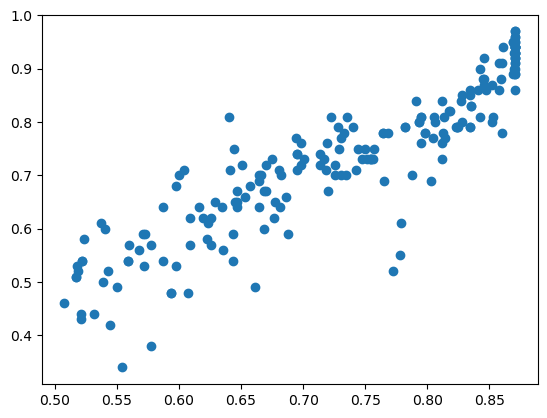

In [85]:
plt.scatter(predicted_values, y_test)
plt.show()

In [86]:
# Calculate and display performance metrics for the regression model
# Metrics include:
# - RMSE (Root Mean Squared Error): Measures the average magnitude of error.
# - MSE (Mean Squared Error): Average squared difference between actual and predicted values.
# - MAE (Mean Absolute Error): Average absolute difference between actual and predicted values.
# - R² (Coefficient of Determination): Proportion of variance explained by the model.
# - Adjusted R²: Adjusted R² to account for the number of predictors and model complexity.

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.062 
MSE = 0.003877328455452078 
MAE = 0.045988401424884785 
R2 = 0.8054715726731494 
Adjusted R2 = 0.798379390426858


In [87]:
# Delete the end-point
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-12-04-07-22-18-500
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-12-04-07-22-18-500
